In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from scipy.interpolate import interp1d

FCS
1. Set initial cluster centers v1,...,vC(randomly)
2. Membership updating:
3. Cluster center updating
4. If Membership u converges, output(u, V) and terminate. Otherwise, go to Step.2

In [2]:
class FCM:
    def __init__(self, data, C, m, N, Q):
        self.data = data
        self.C = C
        self.m = m
        self.N = N
        self.Q = Q
        
    def dist(self, x, v):
        return np.linalg.norm(x - v)
    
    def updateMember(self, u, v):
        new_u = [np.array([None] * self.C) for i in range(self.N)]
        for i in range(self.N):
            for j in range(self.C):
                # if d = 0
                # else
                # otherwise
                new_u[i][j] = 1.0 / sum([(self.dist(self.data[i], v[j]) / self.dist(self.data[i], v[k])) ** (2.0 / (self.m - 1)) for k in range(self.C)])
            
        return new_u
    
    def updateCluster(self, u):
        v = [np.array([0.] * len(self.data)) for i in range(self.C)]
        for i in range(self.C):
            v[i] = sum([u[j][i] ** self.m * np.array(self.data[j]) for j in range(self.N)]) / sum([u[j][i] ** self.m for j in range(self.N)])
        
        return v
        
    def c_means(self):
        u = [np.random.random(self.C) for i in range(self.N)]
        u = [u[i] / sum(u[i]) for i in range(self.N)]
        
        # 1. Set initial cluster centers v1, ..., vc(randomly)
        v = [np.random.random(self.Q) for i in range(self.C)]
        
        while True:
            tmp = u
            # 2. Membership updating
            u = self.updateMember(u, v)
            
            # 3. Cluster center updating
            v = self.updateCluster(u)
            
            # 4. If Membership u converges, output and terminate
            diff = sum([np.linalg.norm(tmp[i] - u[i]) for i in range(self.N)])
            
            if diff < 0.0001:
                break
                       
        return u

In [3]:
def target2Color(target):
    if type(target) == np.ndarray:
        return (target[0], target[1], target[2])
    else:
        return "rgb"[target]

In [4]:
def plot(data, u, C, N):
#     method1
#     X = [i[0] for i in data]
#     Y = [i[1] for i in data]

#     plt.xlim(-0.1, 1.1)
#     plt.ylim(-0.1, 1.1)
    
#     plt.scatter(X, Y, c=[target2Color(t) for t in u])
            
#     plt.show()
#     plt.close('all')

#     method2
    X = [i[0] for i in data]
    Y = [i[1] for i in data]
    plt.plot(X, Y, 'o')

    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)

    for i in range(C):
        P = []
        for j in range(N):
            if u[j][i] > 0.1:
                P.append(data[j])
        if P != []:
            hull = ConvexHull(P)
            x = [P[l][0] for l in hull.vertices]
            y = [P[l][1] for l in hull.vertices]
            orig_len = len(x)
            x = x[-3:-1] + x + x[1:3]
            y = y[-3:-1] + y + y[1:3]
            t = np.arange(len(x))
            ti = np.linspace(2, orig_len + 1, 10 * orig_len)
            xi = interp1d(t, x, kind='cubic')(ti)
            yi = interp1d(t, y, kind='cubic')(ti)
            plt.fill(xi, yi, alpha=0.1)
    plt.show()
    plt.close('all')

In [5]:
def plotFCM(N, Q, data, C):
    for m in [1.1, 1.3, 1.5, 2.0]:
        print("m: {}".format(m))
        fcm = FCM(data, C, m, N, Q)
        u = fcm.c_means()
        plot(data, u, C, N)

In [6]:
def main():
    N = 100 # データ数
    Q = 2 # 次元
    data = np.random.rand(N, Q)
    C = 5 # クラスタ数
    m = 1.3 # fuzzification parameter
    plotFCM(N, Q, data, C)

m: 1.1


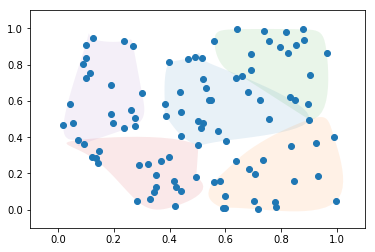

m: 1.3


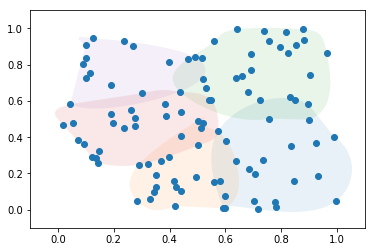

m: 1.5


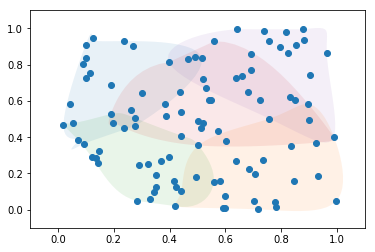

m: 2.0


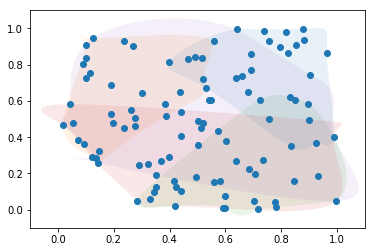

In [7]:
if __name__ == '__main__':
    main()